# Práctica 6: Word Embeddings pt. 2

In [1]:
!pip install numpy==1.24.4

## Práctica 6.2: Reducción de la dimensionalidad

Hay varios métodos que podemos aplicar para reduccir la dimensionalidad de nuestros vectores y asi poder visualizar en un espacio de menor dimensionalidad como estan siendo representados los vectores.
- PCA (Principal Component Analysis)
- T-SNE (t-Distributed Stochastic Neighbor Embedding)
- SVD (Singular Value Decomposition)

### 1) Escoger un modelo pre-entrenado visto en clase o entrenar uno propio y cargarlo en memoria
    - [Carpeta con los modelos 📕](https://drive.google.com/drive/folders/1reor2FGsfOB6m3AvfCE16NOHltAFjuvz?usp=sharing)

In [2]:
!pip install gensim

In [3]:
from gensim.models import word2vec, FastText

In [4]:
def load_model(filename):
    try:
        print(f"Searching for model {filename}")
        model = word2vec.Word2Vec.load(filename)
        print("Model found! Loading...")
        model.save(model_name)
        print("Done")
        return model
    except Exception as e:
        print(f"Modelo {filename} not found. Exception: {e}")

In [5]:
model_name = "models/eswiki-large-vs500-w6-SKIP_GRAM.model"
skip_gram_500 = load_model(model_name)

Searching for model models/eswiki-large-vs500-w6-SKIP_GRAM.model
Model found! Loading...
Done


### 2) Aplicar los 3 algoritmos de reduccion de dimensionalidad
    - Reducir a 2d
    - Plotear 100 vectores al azar
        - Se deben plotear los mismos 100 en los tres casos
    - Analizar y comparar las topologías que se generan con cada algoritmo

In [6]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

def plot_from_indices(vectors, indices, model):
    """
    Params:
        - vectors: list of reduced vectors. Has the same length as the original list of vectors.
        - indices: list of indices of the vectors (in list vectors) we want to plot.
    """
    plt.scatter(vectors[indices, 0], vectors[indices, 1])
    vocabulary = model.wv.index_to_key
    words = [vocabulary[i] for i in indices]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors[indices[i], 0], vectors[indices[i], 1]))
    plt.show()

def get_random_indices(vectors, n):
    """
    Selects n random indices of list vectors
    """
    return np.random.choice(vectors.shape[0], n, replace=False)

def plot_n_random(vectors, n, model):
    """
    Selects n random indices of list vectors, and plots them. List vectors must have the same length as the original list of vectors.
    """
    random_indices = get_random_indices(vectors, n)
    plot_from_indices(vectors, random_indices, model)

def plot_all_with_tags(new_vectors, original_indices, model):
    """
    Use when the list of vectors you want to plot has a diferent length that the original one.
    Params:
        - new_vectors: list with all the reduced vectors that we want to plot. It can have a diferent length then the original list of vectors.
        - original_indices: 
            indices that the words in new_vectors have in the original list of vectors. Important: index i must correspond to the i-th element in new_vectors
        - model: gensim model we're using
    """
    plt.figure(figsize=(15, 15))
    plt.scatter(new_vectors[:, 0], new_vectors[:, 1], s=3)
    vocabulary = model.wv.index_to_key
    words = [vocabulary[i] for i in original_indices]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(new_vectors[i, 0], new_vectors[i, 1]), fontsize=7)
    plt.show()
    

In [7]:
model = skip_gram_500

# Elegimos los 100 vectores
random_indices = get_random_indices(model.wv.vectors, 100)
random_vectors = model.wv.vectors[random_indices]

#### PCA (Principal Component Analysis)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
print("Reducing the word vectors with PCA...")
pca_vectors = pca.fit_transform(random_vectors)
print("Done!")

Reducing the word vectors with PCA...
Done!


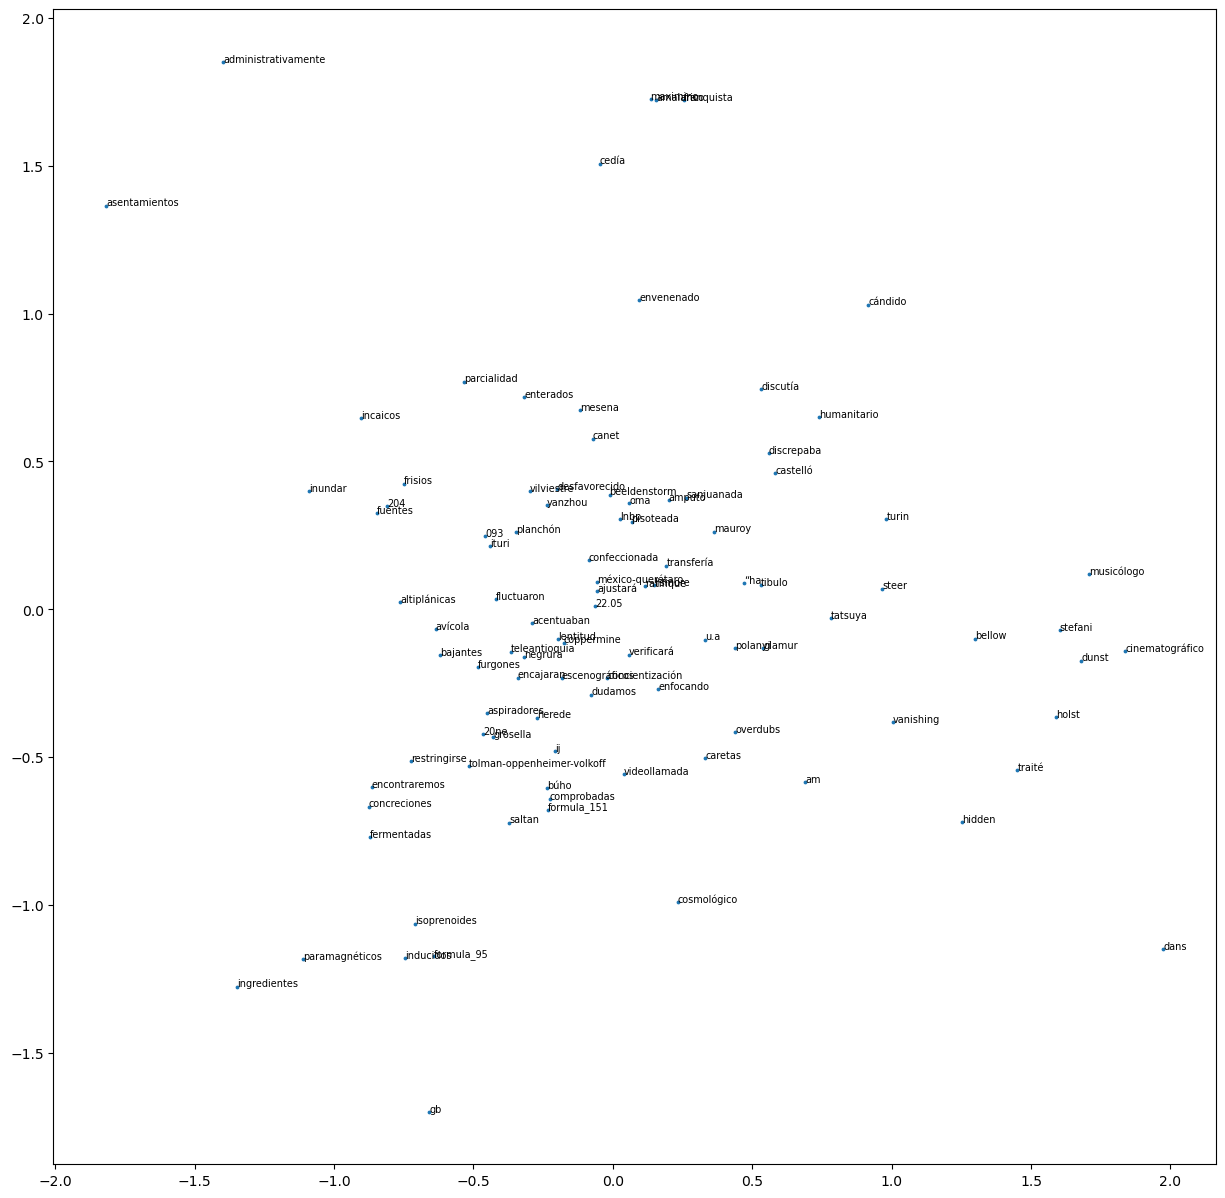

In [10]:
plot_all_with_tags(pca_vectors, random_indices, model)

#### T-SNE (t-Distributed Stochastic Neighbor Embedding)

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
print("Reducing the word vectors with t-SNE...")
tsne_vectors = tsne.fit_transform(random_vectors)
print("Done!")

Reducing the word vectors with t-SNE...
Done!


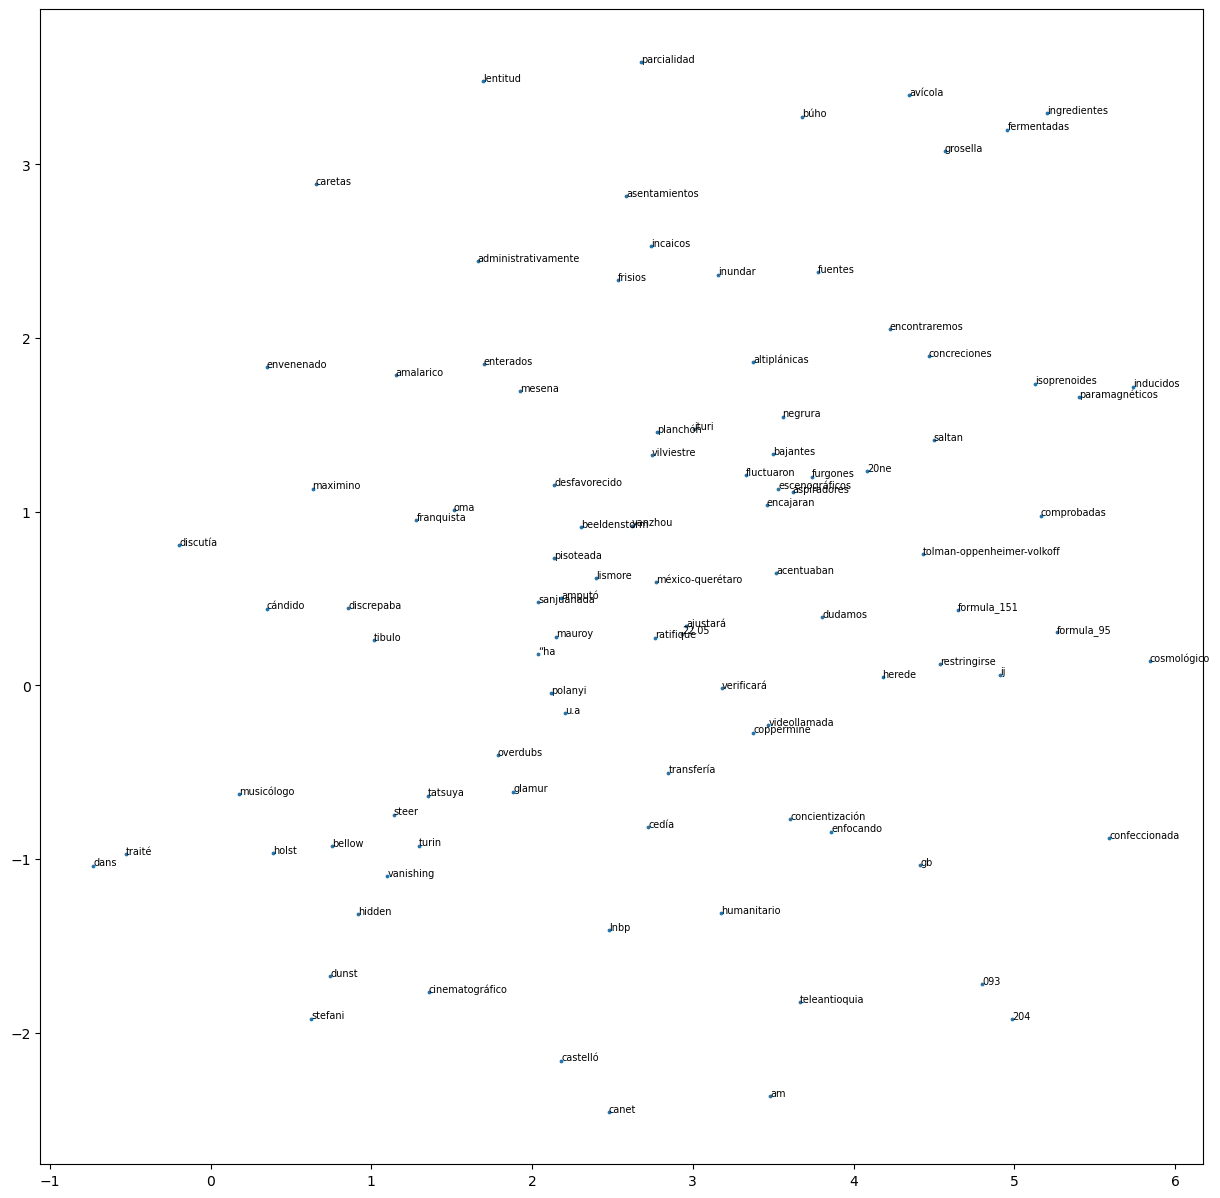

In [12]:
plot_all_with_tags(tsne_vectors, random_indices, model)

#### SVD (Singular Value Decomposition)

In [13]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) 
print("Reducing the word vectors with SVD...")
svd_vectors = svd.fit_transform(random_vectors)
print("Done!")

Reducing the word vectors with SVD...
Done!


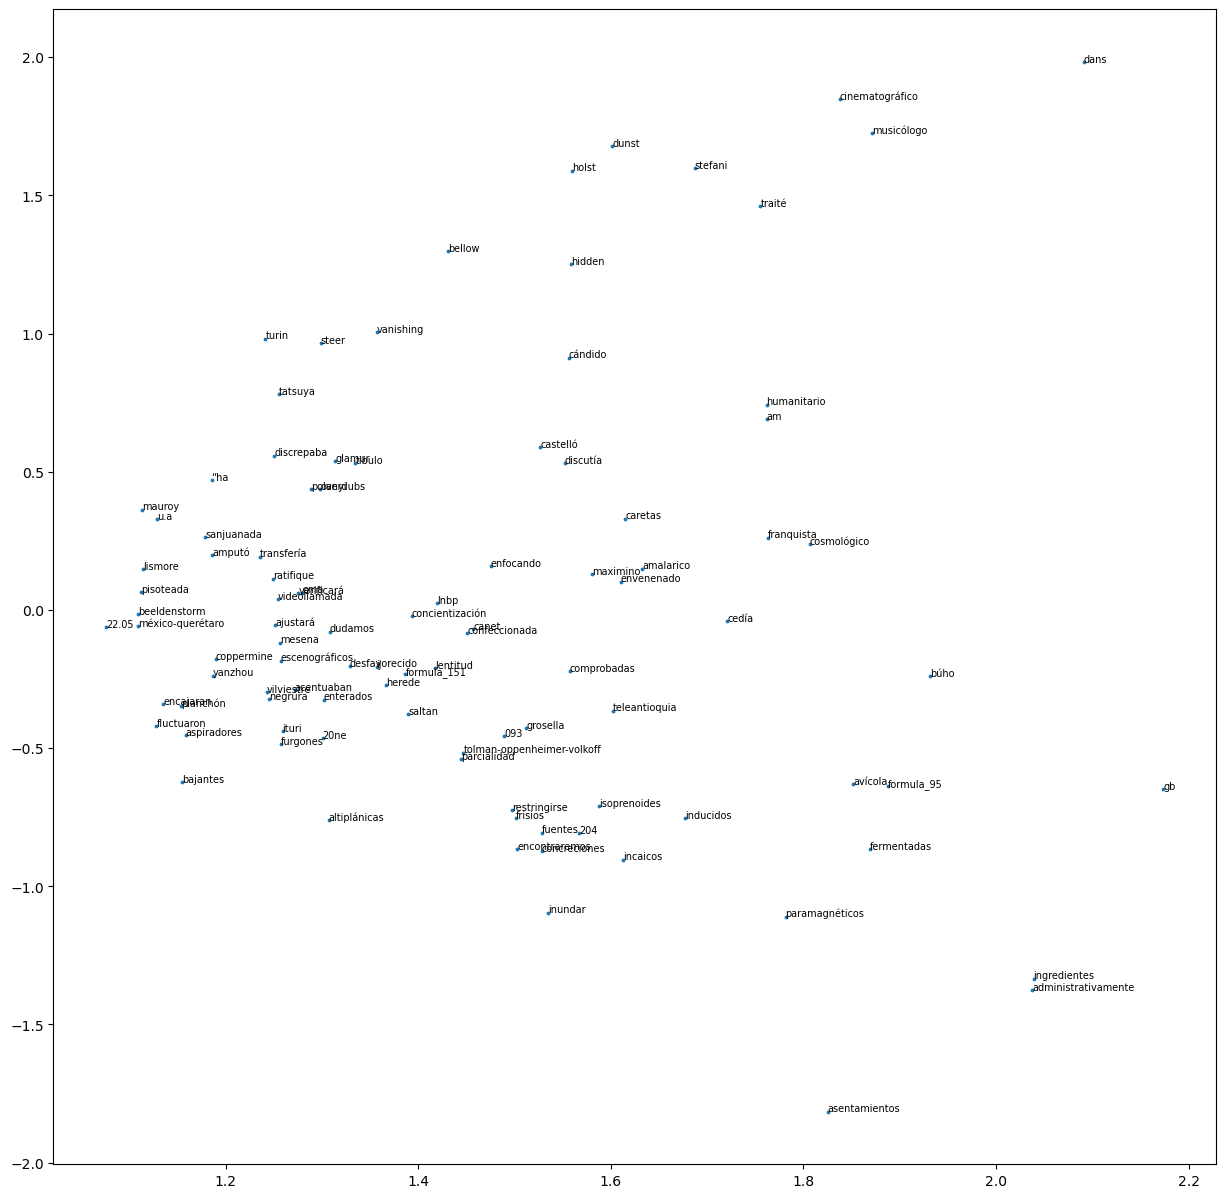

In [14]:
plot_all_with_tags(svd_vectors, random_indices, model)

### Analizar y comparar las topologías que se generan con cada algoritmo

Después de realizar la reducción de la dimensionalidad con diferentes conjuntos de vectores al azar, notamos que usando el algoritmo t-SNE, los vectores están más separado, y distribuidos más equitativamente en todo el espacio. Mientras que usando SVD y PCA están más juntos y concentrados en una pequeña sección del espacio.